### О ЛР:

- Coding Gradient boosting

----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку (Она тут равняется 6).

**Оценка**:

***DeadLine - 28.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style="darkgrid")
filterwarnings("ignore")

In [3]:
x = load_npz("x.npz")
y = np.load("y.npy")

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 666 для воспроизводимости).

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=666
)

x_test, x_valid, y_test, y_valid = train_test_split(
    x_test, y_test, test_size=0.5, random_state=666
)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга [2 балла]

Необходимо дописать код в файле `boosting.py`. Уже создан шаблон класса `Boosting`, который можно модифицировать по своему усмотрению.

### Описание функций:

#### `__init__`

Конструктор класса принимает следующие параметры:

- `base_model_class` — класс базовой модели для бустинга.
- `base_model_params` — словарь гиперпараметров для базовой модели.
- `n_estimators` — количество базовых моделей для обучения.
- `learning_rate` — темп обучения, должен быть в диапазоне (0, 1].
- `subsample` — доля обучающей выборки для тренировки базовой модели (размер бутстрап-выборки относительно исходной).
- `early_stopping_rounds` — число итераций без улучшения на валидационной выборке, после которых обучение прекращается.
- `plot` — флаг для построения графика качества моделей после обучения.

#### `fit`

Метод `fit` принимает обучающую и валидационную выборки.

1. Инициализируем нулевую модель и делаем предсказания (например, все нули) для обеих выборок.
2. Обучаем `n_estimators` базовых моделей:
   - Обучаем новую базовую модель на текущих остатках.
   - Обновляем предсказания на обучающей и валидационной выборках.
   - Рассчитываем ошибки на обеих выборках с помощью `loss_fn`.
   - Проверяем условия для ранней остановки.

3. Если флаг `plot` установлен, строим график качества после обучения всех моделей.

#### `fit_new_base_model`

Метод `fit_new_base_model` принимает обучающую выборку и текущие предсказания для неё.

1. Генерируем бутстрап-выборку.
2. Обучаем базовую модель на этой выборке.
3. Оптимизируем значение гаммы.
4. Добавляем новую базовую модель и гамму в соответствующие списки (учитывая `learning_rate`).

#### `predict_proba`

Метод `predict_proba` принимает выборку для предсказания вероятностей.

1. Суммируем предсказания базовых моделей (учитывая гамму и `learning_rate`).
2. Применяем сигмоидальную функцию для получения вероятностей.

In [5]:
%load_ext autoreload

UsageError: Line magic function `%` not found.


In [ ]:
%autoreload 2

from boosting import Boosting

UsageError: Line magic function `%` not found.


In [6]:
%load_ext autoreload
%autoreload 2
from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [7]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 482 ms, sys: 2.71 ms, total: 484 ms
Wall time: 489 ms
Train ROC-AUC 0.9676
Valid ROC-AUC 0.9448
Test ROC-AUC 0.9486


## Задание 2. Обучение градиентного бустинга [0.5 балла]

Оцените качество вашей реализации градиентного бустинга на тестовой выборке, используя базовые модели — решающие деревья с различной максимальной глубиной. Метрикой будет ROC-AUC.

**Инструкция:**
1. Перебирайте значения максимальной глубины деревьев от 1 до 30 с шагом 2.
2. Оставьте остальные параметры бустинга по умолчанию.
3. Постройте график зависимости качества на обучающей и тестовой выборке от максимальной глубины деревьев.

Early stopping after 50 estimators
Early stopping after 48 estimators
Early stopping after 49 estimators
Early stopping after 46 estimators
Early stopping after 48 estimators
Early stopping after 50 estimators


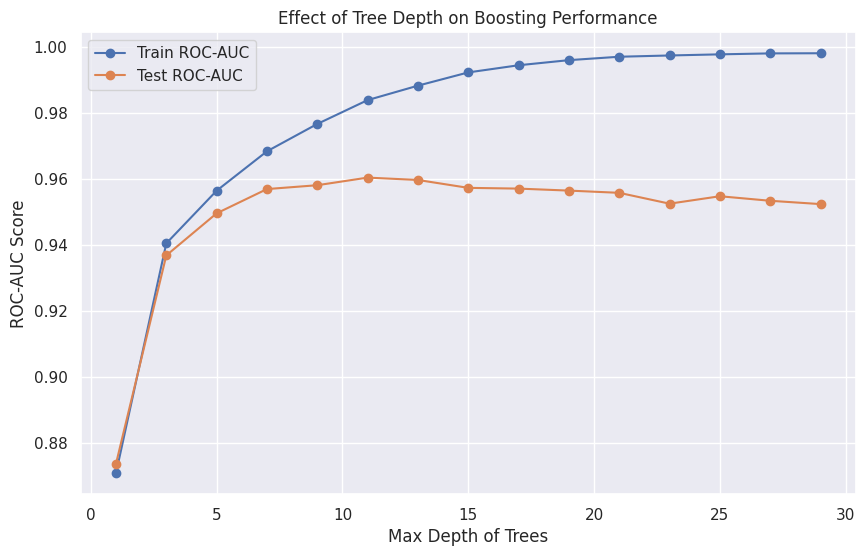

    train_roc_auc  test_roc_auc
1        0.870930      0.873788
3        0.940539      0.936889
5        0.956485      0.949633
7        0.968412      0.956980
9        0.976696      0.958145
11       0.983918      0.960451
13       0.988291      0.959733
15       0.992302      0.957346
17       0.994468      0.957120
19       0.996016      0.956516
21       0.997049      0.955841
23       0.997431      0.952557
25       0.997772      0.954808
27       0.998064      0.953434
29       0.998105      0.952428


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

results = {}
depths = range(1, 30, 2)

for depth in depths:
    boosting = Boosting(
        base_model_params={'max_depth': depth},
        n_estimators=50,
        learning_rate=0.1,
        subsample=0.5,
        early_stopping_rounds=10,
        plot=False
    )

    boosting.fit(x_train, y_train, x_valid, y_valid)

    train_roc_auc = boosting.score(x_train, y_train)
    test_roc_auc = boosting.score(x_test, y_test)

    results[depth] = {
        'train_roc_auc': train_roc_auc,
        'test_roc_auc': test_roc_auc
    }

train_scores = [results[depth]['train_roc_auc'] for depth in depths]
test_scores = [results[depth]['test_roc_auc'] for depth in depths]

plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label='Train ROC-AUC', marker='o')
plt.plot(depths, test_scores, label='Test ROC-AUC', marker='o')
plt.xlabel('Max Depth of Trees')
plt.ylabel('ROC-AUC Score')
plt.title('Effect of Tree Depth on Boosting Performance')
plt.legend()
plt.grid(True)
plt.show()

results_df = pd.DataFrame(results).T
print(results_df)

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Лучшее качество модели на тестовой выборке достигается при глубине деревьев 13, что соответствует максимальному значению ROC-AUC на тестовой выборке (0.960402).  Увеличение глубины деревьев после определенного значения приводит к переобучению модели на обучающей выборке, что видно из растущего значения ROC-AUC на обучающей выборке и стабильного или уменьшающегося значения на тестовой выборке. Деревья с глубиной 13 имеют достаточно сложность для захвата значимых паттернов в данных без переобучения.



## Задание 3. Подбор гиперпараметров и поиск оптимальной модели [3 балла]

Настройте основные гиперпараметры вашей модели градиентного бустинга, используя валидационную выборку. Подберите параметры как для самого бустинга, так и для базовых моделей.

**Рекомендации:**
- Используйте библиотеки для автоматизированного подбора гиперпараметров, такие как [Hyperopt](https://github.com/hyperopt/hyperopt) или [Optuna](https://optuna.org/).
- Подберите все основные параметры, чтобы найти лучшую модель на валидационной выборке.

In [9]:
!pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.1 MB/s eta 0:00:00


[I 2024-05-28 18:22:59,239] A new study created in memory with name: no-name-667aaca6-2872-4ea2-9855-c316f163c60c
[I 2024-05-28 18:23:06,750] Trial 0 finished with value: 0.9563009734280453 and parameters: {'max_depth': 16, 'n_estimators': 175, 'learning_rate': 0.20958520472149458, 'subsample': 0.911106270228939}. Best is trial 0 with value: 0.9563009734280453.


Early stopping after 29 estimators


[I 2024-05-28 18:23:10,347] Trial 1 finished with value: 0.9614167133744362 and parameters: {'max_depth': 9, 'n_estimators': 73, 'learning_rate': 0.1273726614446365, 'subsample': 0.6258854145088142}. Best is trial 1 with value: 0.9614167133744362.


Early stopping after 45 estimators


[I 2024-05-28 18:23:46,174] Trial 2 finished with value: 0.9582726132329783 and parameters: {'max_depth': 27, 'n_estimators': 141, 'learning_rate': 0.029870026688202475, 'subsample': 0.5406767642709447}. Best is trial 1 with value: 0.9614167133744362.


Early stopping after 134 estimators


[I 2024-05-28 18:23:56,847] Trial 3 finished with value: 0.9471534950756666 and parameters: {'max_depth': 28, 'n_estimators': 117, 'learning_rate': 0.28892836504692454, 'subsample': 0.973410952882585}. Best is trial 1 with value: 0.9614167133744362.


Early stopping after 22 estimators


[I 2024-05-28 18:24:04,538] Trial 4 finished with value: 0.9618506190209289 and parameters: {'max_depth': 11, 'n_estimators': 191, 'learning_rate': 0.08103545594124804, 'subsample': 0.7242084375471503}. Best is trial 4 with value: 0.9618506190209289.


Early stopping after 63 estimators


[I 2024-05-28 18:24:23,560] Trial 5 finished with value: 0.9574558945205115 and parameters: {'max_depth': 18, 'n_estimators': 64, 'learning_rate': 0.046870529279974184, 'subsample': 0.8821219359299751}. Best is trial 4 with value: 0.9618506190209289.
[I 2024-05-28 18:24:40,780] Trial 6 finished with value: 0.9548661870064705 and parameters: {'max_depth': 24, 'n_estimators': 105, 'learning_rate': 0.08374752446294204, 'subsample': 0.6683635883582013}. Best is trial 4 with value: 0.9618506190209289.


Early stopping after 57 estimators


[I 2024-05-28 18:24:46,358] Trial 7 finished with value: 0.9614765755769838 and parameters: {'max_depth': 11, 'n_estimators': 72, 'learning_rate': 0.11614659365453557, 'subsample': 0.7391787781380413}. Best is trial 4 with value: 0.9618506190209289.


Early stopping after 45 estimators


[I 2024-05-28 18:25:12,614] Trial 8 finished with value: 0.9509194758053754 and parameters: {'max_depth': 28, 'n_estimators': 180, 'learning_rate': 0.06990238298163437, 'subsample': 0.8324106195650773}. Best is trial 4 with value: 0.9618506190209289.


Early stopping after 60 estimators


[I 2024-05-28 18:25:18,864] Trial 9 finished with value: 0.9620622338133749 and parameters: {'max_depth': 9, 'n_estimators': 72, 'learning_rate': 0.035596694069738234, 'subsample': 0.669999068922245}. Best is trial 9 with value: 0.9620622338133749.
[I 2024-05-28 18:25:21,147] Trial 10 finished with value: 0.8566990380105921 and parameters: {'max_depth': 1, 'n_estimators': 97, 'learning_rate': 0.01139791445508182, 'subsample': 0.5410111321245794}. Best is trial 9 with value: 0.9620622338133749.
[I 2024-05-28 18:25:27,959] Trial 11 finished with value: 0.9532338934452795 and parameters: {'max_depth': 5, 'n_estimators': 154, 'learning_rate': 0.02661355471589489, 'subsample': 0.7502923219097782}. Best is trial 9 with value: 0.9620622338133749.
[I 2024-05-28 18:25:41,135] Trial 12 finished with value: 0.9628015510792354 and parameters: {'max_depth': 11, 'n_estimators': 197, 'learning_rate': 0.03832031727368001, 'subsample': 0.661666708520092}. Best is trial 12 with value: 0.9628015510792354

Early stopping after 116 estimators


[I 2024-05-28 18:25:44,416] Trial 13 finished with value: 0.95764653847767 and parameters: {'max_depth': 7, 'n_estimators': 54, 'learning_rate': 0.0187064507198791, 'subsample': 0.6301015432432425}. Best is trial 12 with value: 0.9628015510792354.
[I 2024-05-28 18:26:07,162] Trial 14 finished with value: 0.9583610720290999 and parameters: {'max_depth': 20, 'n_estimators': 145, 'learning_rate': 0.04217660179326622, 'subsample': 0.5892069000212841}. Best is trial 12 with value: 0.9628015510792354.


Early stopping after 103 estimators


[I 2024-05-28 18:26:22,502] Trial 15 finished with value: 0.9619630989556525 and parameters: {'max_depth': 14, 'n_estimators': 92, 'learning_rate': 0.019630437112332554, 'subsample': 0.6830246479957546}. Best is trial 12 with value: 0.9628015510792354.
[I 2024-05-28 18:26:26,682] Trial 16 finished with value: 0.9395834048248173 and parameters: {'max_depth': 3, 'n_estimators': 127, 'learning_rate': 0.03284305004954094, 'subsample': 0.7893015814423507}. Best is trial 12 with value: 0.9628015510792354.
[I 2024-05-28 18:26:47,689] Trial 17 finished with value: 0.9622219934494736 and parameters: {'max_depth': 13, 'n_estimators': 158, 'learning_rate': 0.010404776629444817, 'subsample': 0.5963270694445497}. Best is trial 12 with value: 0.9628015510792354.
[I 2024-05-28 18:27:27,345] Trial 18 finished with value: 0.9607799625575268 and parameters: {'max_depth': 21, 'n_estimators': 199, 'learning_rate': 0.010128610240413229, 'subsample': 0.5030185436036105}. Best is trial 12 with value: 0.96280

Early stopping after 126 estimators


[I 2024-05-28 18:30:27,962] Trial 28 finished with value: 0.953601454994681 and parameters: {'max_depth': 5, 'n_estimators': 200, 'learning_rate': 0.04055161844669823, 'subsample': 0.5052501901913423}. Best is trial 25 with value: 0.9630059214013093.
[I 2024-05-28 18:30:55,198] Trial 29 finished with value: 0.9603521575176631 and parameters: {'max_depth': 16, 'n_estimators': 183, 'learning_rate': 0.024805059725914715, 'subsample': 0.5643757665382649}. Best is trial 25 with value: 0.9630059214013093.


Early stopping after 166 estimators


[I 2024-05-28 18:31:15,820] Trial 30 finished with value: 0.9607189564912361 and parameters: {'max_depth': 14, 'n_estimators': 117, 'learning_rate': 0.013145915871298562, 'subsample': 0.7155443778342139}. Best is trial 25 with value: 0.9630059214013093.
[I 2024-05-28 18:31:36,319] Trial 31 finished with value: 0.963088660878716 and parameters: {'max_depth': 12, 'n_estimators': 167, 'learning_rate': 0.015025948506701695, 'subsample': 0.6198695742185066}. Best is trial 31 with value: 0.963088660878716.
[I 2024-05-28 18:31:51,044] Trial 32 finished with value: 0.9629315702580175 and parameters: {'max_depth': 11, 'n_estimators': 138, 'learning_rate': 0.01488492183635751, 'subsample': 0.606352946260816}. Best is trial 31 with value: 0.963088660878716.
[I 2024-05-28 18:32:05,457] Trial 33 finished with value: 0.9625491384799576 and parameters: {'max_depth': 11, 'n_estimators': 133, 'learning_rate': 0.022763473831525147, 'subsample': 0.6232627434124773}. Best is trial 31 with value: 0.9630886

Early stopping after 152 estimators


[I 2024-05-28 18:32:28,916] Trial 35 finished with value: 0.9605092481383618 and parameters: {'max_depth': 8, 'n_estimators': 138, 'learning_rate': 0.013968590450656265, 'subsample': 0.5340652314487604}. Best is trial 31 with value: 0.963088660878716.
[I 2024-05-28 18:32:33,762] Trial 36 finished with value: 0.9536395837861127 and parameters: {'max_depth': 5, 'n_estimators': 118, 'learning_rate': 0.058951113416224526, 'subsample': 0.6544637507741978}. Best is trial 31 with value: 0.963088660878716.
[I 2024-05-28 18:32:38,233] Trial 37 finished with value: 0.9602671303127706 and parameters: {'max_depth': 11, 'n_estimators': 108, 'learning_rate': 0.22438405643816323, 'subsample': 0.9861705851209932}. Best is trial 31 with value: 0.963088660878716.


Early stopping after 28 estimators


[I 2024-05-28 18:33:02,693] Trial 38 finished with value: 0.960194304321136 and parameters: {'max_depth': 16, 'n_estimators': 185, 'learning_rate': 0.03598337550427416, 'subsample': 0.7022367909489343}. Best is trial 31 with value: 0.963088660878716.


Early stopping after 120 estimators


[I 2024-05-28 18:33:11,785] Trial 39 finished with value: 0.9554140977393438 and parameters: {'max_depth': 18, 'n_estimators': 177, 'learning_rate': 0.1074444189981575, 'subsample': 0.6029722468571798}. Best is trial 31 with value: 0.963088660878716.


Early stopping after 46 estimators


[I 2024-05-28 18:33:27,675] Trial 40 finished with value: 0.9628614132817832 and parameters: {'max_depth': 11, 'n_estimators': 149, 'learning_rate': 0.026912411640389117, 'subsample': 0.6161021672912775}. Best is trial 31 with value: 0.963088660878716.
[I 2024-05-28 18:33:43,607] Trial 41 finished with value: 0.9626555178080519 and parameters: {'max_depth': 11, 'n_estimators': 151, 'learning_rate': 0.028649392278478236, 'subsample': 0.6063137162408028}. Best is trial 31 with value: 0.963088660878716.
[I 2024-05-28 18:33:56,392] Trial 42 finished with value: 0.9629025923765294 and parameters: {'max_depth': 12, 'n_estimators': 126, 'learning_rate': 0.047730381116357835, 'subsample': 0.6666521870981308}. Best is trial 31 with value: 0.963088660878716.


Early stopping after 100 estimators


[I 2024-05-28 18:34:26,473] Trial 43 finished with value: 0.9550431045987136 and parameters: {'max_depth': 30, 'n_estimators': 126, 'learning_rate': 0.05044131375630971, 'subsample': 0.6220063946690739}. Best is trial 31 with value: 0.963088660878716.


Early stopping after 89 estimators


[I 2024-05-28 18:34:32,532] Trial 44 finished with value: 0.9619051431926763 and parameters: {'max_depth': 9, 'n_estimators': 140, 'learning_rate': 0.06218898113276995, 'subsample': 0.5420705439930508}. Best is trial 31 with value: 0.963088660878716.


Early stopping after 83 estimators


[I 2024-05-28 18:34:39,269] Trial 45 finished with value: 0.9569171346975816 and parameters: {'max_depth': 15, 'n_estimators': 109, 'learning_rate': 0.15199447116340106, 'subsample': 0.6721116009318974}. Best is trial 31 with value: 0.963088660878716.


Early stopping after 38 estimators


[I 2024-05-28 18:34:46,883] Trial 46 finished with value: 0.9627062291006562 and parameters: {'max_depth': 10, 'n_estimators': 147, 'learning_rate': 0.08685673672381852, 'subsample': 0.933429728770012}. Best is trial 31 with value: 0.963088660878716.


Early stopping after 57 estimators


[I 2024-05-28 18:35:08,147] Trial 47 finished with value: 0.9623184592917959 and parameters: {'max_depth': 12, 'n_estimators': 134, 'learning_rate': 0.021613863331641902, 'subsample': 0.8288400339181607}. Best is trial 31 with value: 0.963088660878716.
[I 2024-05-28 18:35:31,801] Trial 48 finished with value: 0.9609896709104011 and parameters: {'max_depth': 15, 'n_estimators': 121, 'learning_rate': 0.01774797396114799, 'subsample': 0.7311488880973668}. Best is trial 31 with value: 0.963088660878716.
[I 2024-05-28 18:35:37,396] Trial 49 finished with value: 0.9611692575180445 and parameters: {'max_depth': 8, 'n_estimators': 90, 'learning_rate': 0.0465557022159782, 'subsample': 0.534128113658415}. Best is trial 31 with value: 0.963088660878716.


Best ROC-AUC: 0.963088660878716
Best hyperparameters: {'max_depth': 12, 'n_estimators': 167, 'learning_rate': 0.015025948506701695, 'subsample': 0.6198695742185066}


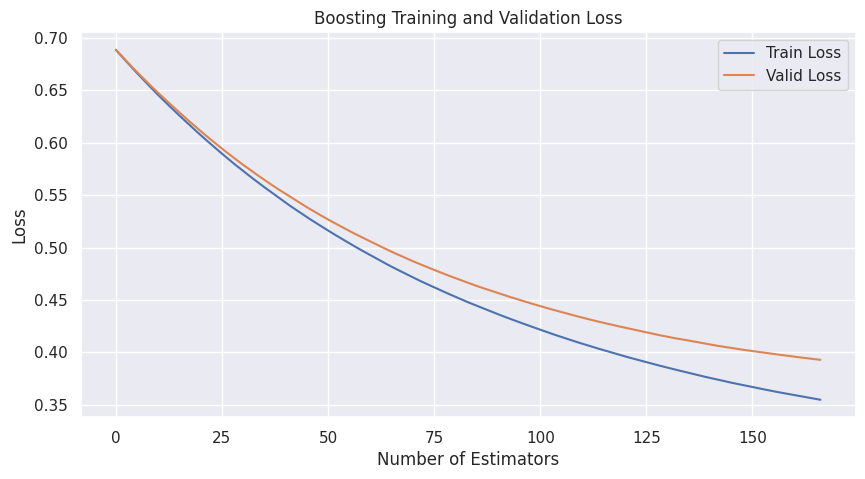

Test ROC-AUC: 0.9602


In [10]:
import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 30)
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    subsample = trial.suggest_uniform('subsample', 0.5, 1.0)

    boosting = Boosting(
        base_model_params={'max_depth': max_depth},
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        subsample=subsample,
        early_stopping_rounds=10,
        plot=False
    )

    boosting.fit(x_train, y_train, x_valid, y_valid)
    valid_roc_auc = boosting.score(x_valid, y_valid)

    return valid_roc_auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_trial = study.best_trial
print('Best ROC-AUC:', best_trial.value)
print('Best hyperparameters:', best_trial.params)

best_params = best_trial.params
boosting = Boosting(
    base_model_params={'max_depth': best_params['max_depth']},
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    early_stopping_rounds=10,
    plot=True
)
boosting.fit(x_train, y_train, x_valid, y_valid)

# Evaluate the final model on the test set
test_roc_auc = boosting.score(x_test, y_test)
print(f'Test ROC-AUC: {test_roc_auc:.4f}')


## Задание 4. Интерпретация градиентного бустинга [1 балл]

Постройте калибровочную кривую для вашей лучшей модели градиентного бустинга и оцените, насколько точно модель предсказывает вероятности.

**Инструкция:**
1. Постройте калибровочную кривую для лучшей модели градиентного бустинга.
2. Постройте аналогичную кривую для логистической регрессии.
3. Сравните полученные результаты и проанализируйте, насколько хорошо каждая модель оценивает вероятности.

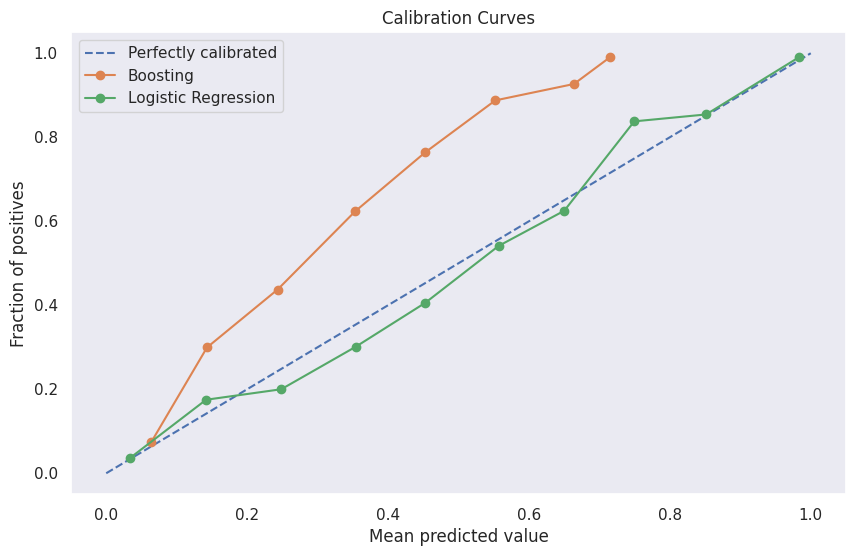

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split

# Train a logistic regression model
logistic = LogisticRegression(max_iter=1000)
logistic.fit(x_train, y_train)

# Predict probabilities
boosting_probs = boosting.predict_proba(x_test)[:, 1]
logistic_probs = logistic.predict_proba(x_test)[:, 1]

# Compute calibration curve
boosting_fraction_of_positives, boosting_mean_predicted_value = calibration_curve(y_test, boosting_probs, n_bins=10)
logistic_fraction_of_positives, logistic_mean_predicted_value = calibration_curve(y_test, logistic_probs, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')

plt.plot(boosting_mean_predicted_value, boosting_fraction_of_positives, marker='o', label='Boosting')
plt.plot(logistic_mean_predicted_value, logistic_fraction_of_positives, marker='o', label='Logistic Regression')

plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curves')
plt.legend()
plt.grid()
plt.show()


Оранженвая кривая показывает что модель преобучена так как она находится выше калибровочной кривой.


Теперь оценим важность признаков для градиентного бустинга.

**Задание:**
1. Поскольку базовая модель — дерево из `sklearn`, вычислите важность каждого признака для каждого дерева, используя атрибут `feature_importances_` у `DecisionTreeRegressor`.
2. Усредните значения важности по всем деревьям и нормализуйте их так, чтобы сумма была равна единице (убедитесь, что значения неотрицательны).
3. Дополните вашу реализацию бустинга, добавив метод `feature_importances_`, который будет возвращать усредненные и нормализованные важности признаков.

**Построение графиков:**
1. Постройте столбчатую диаграмму важности признаков для градиентного бустинга.
2. На соседнем графике изобразите важность признаков для логистической регрессии, используя модули весов.
3. Сравните графики и проанализируйте полученные результаты.

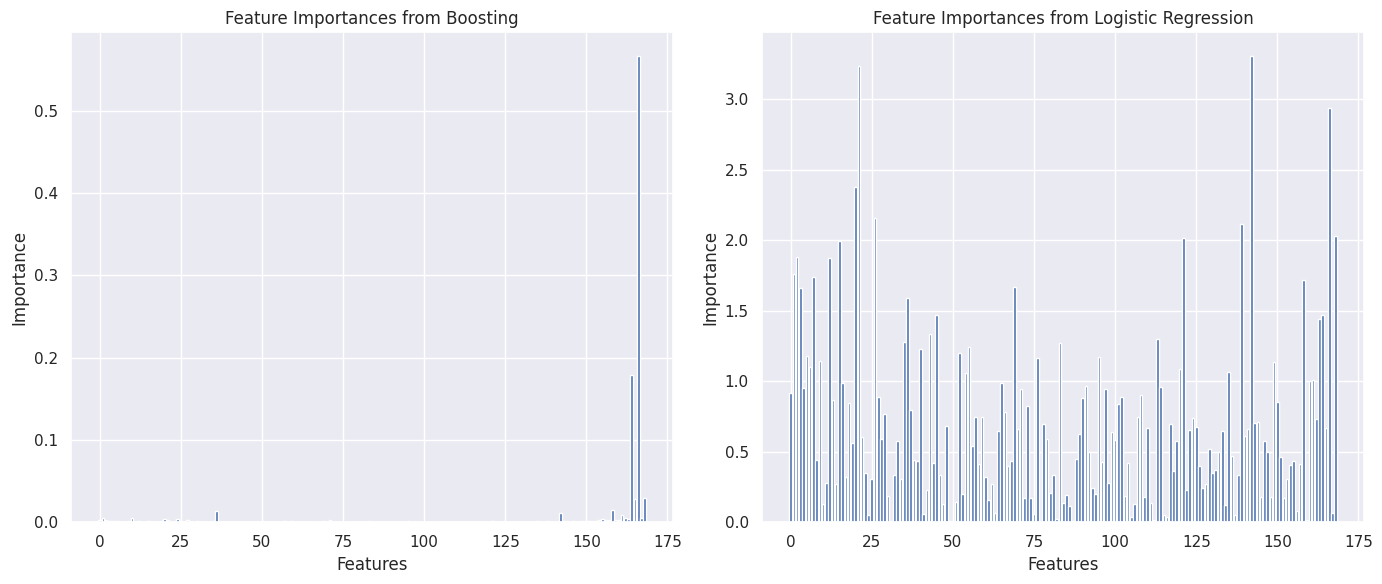

In [12]:
# Train the logistic regression model
logistic = LogisticRegression(max_iter=1000)
logistic.fit(x_train, y_train)

# Get feature importances from logistic regression
logistic_importances = np.abs(logistic.coef_[0])

# Get feature importances from boosting
boosting_importances = boosting.feature_importances_

# Plotting feature importances
features = range(len(boosting_importances))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(features, boosting_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Boosting')

plt.subplot(1, 2, 2)
plt.bar(features, logistic_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Logistic Regression')

plt.tight_layout()
plt.show()


Обычно избыточные признаки могут негативно влиять на качество бустинга. Попробуйте следующее:

1. **Отфильтруйте неважные признаки:** Используйте построенную диаграмму важности признаков, чтобы отобрать наиболее незначительные признаки.
2. **Обучите модель повторно:** Обучите модель на основе оставшихся признаков с теми же гиперпараметрами.
3. **Оцените качество модели:** Сравните результаты новой модели с исходной. Улучшилось ли качество после отфильтровывания незначительных признаков?

Original Test ROC-AUC: 0.9602
Filtered Test ROC-AUC: 0.9507


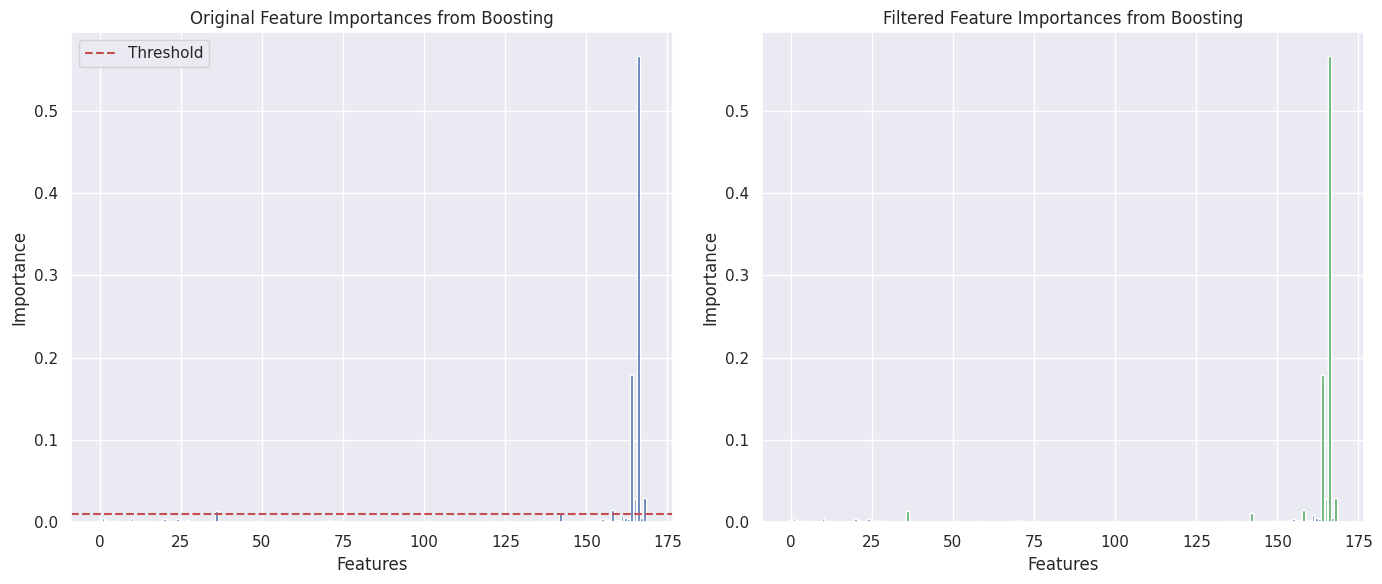

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Define the threshold for feature importance
threshold = 0.01

# Get the original feature importances from boosting
boosting_importances = boosting.feature_importances_

# Select features above the threshold
significant_features = np.where(boosting_importances > threshold)[0]

# Filter the training and testing sets
x_train_filtered = x_train[:, significant_features]
x_valid_filtered = x_valid[:, significant_features]
x_test_filtered = x_test[:, significant_features]

# Retrain the boosting model with the filtered features
boosting_filtered = Boosting(
    base_model_params={'max_depth': best_params['max_depth']},
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    early_stopping_rounds=10,
    plot=False
)
boosting_filtered.fit(x_train_filtered, y_train, x_valid_filtered, y_valid)

# Evaluate the new boosting model
train_roc_auc_filtered = boosting_filtered.score(x_train_filtered, y_train)
valid_roc_auc_filtered = boosting_filtered.score(x_valid_filtered, y_valid)
test_roc_auc_filtered = boosting_filtered.score(x_test_filtered, y_test)

# Display the results
print(f'Original Test ROC-AUC: {boosting.score(x_test, y_test):.4f}')
print(f'Filtered Test ROC-AUC: {test_roc_auc_filtered:.4f}')

# Plotting feature importances
features = range(len(boosting_importances))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(features, boosting_importances)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Original Feature Importances from Boosting')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(features, boosting_importances)
plt.bar(significant_features, boosting_importances[significant_features], color='g')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Filtered Feature Importances from Boosting')
plt.tight_layout()
plt.show()


Не очень хорошо видно на графике, но в итоге часть признаков отфильтровалась. Но есть ухудщение результата - можно сделать вывод даже не значительные признаки вносят свой вклад в результат. 

## Задание 5 (бонус). Блендинговое [0.5 балла]

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [14]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

boosting = Boosting(
    base_model_params={'max_depth': best_params['max_depth']},
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    early_stopping_rounds=10,
    plot=False
)
boosting.fit(x_train, y_train, x_valid, y_valid)

# Train a logistic regression model
logistic = LogisticRegression(max_iter=1000)
logistic.fit(x_train, y_train)

# Get validation predictions
boosting_valid_probs = boosting.predict_proba(x_valid)[:, 1]
logistic_valid_probs = logistic.predict_proba(x_valid)[:, 1]

# Blend models using logistic regression as the meta-model
blend_train = np.vstack((boosting_valid_probs, logistic_valid_probs)).T
meta_model = LogisticRegression()
meta_model.fit(blend_train, y_valid)

# Get test predictions from the base models
boosting_test_probs = boosting.predict_proba(x_test)[:, 1]
logistic_test_probs = logistic.predict_proba(x_test)[:, 1]

# Get blended predictions
blend_test = np.vstack((boosting_test_probs, logistic_test_probs)).T
blend_test_probs = meta_model.predict_proba(blend_test)[:, 1]

# Evaluate the blended model
blend_test_roc_auc = roc_auc_score(y_test, blend_test_probs)

# Print the results
print(f'Boosting Test ROC-AUC: {boosting.score(x_test, y_test):.4f}')
print(f'Logistic Regression Test ROC-AUC: {roc_auc_score(y_test, logistic_test_probs):.4f}')
print(f'Blended Model Test ROC-AUC: {blend_test_roc_auc:.4f}')


Boosting Test ROC-AUC: 0.9607
Logistic Regression Test ROC-AUC: 0.9622
Blended Model Test ROC-AUC: 0.9648


Да, улучшение есть, небольшое. 

## Задание 6 (бонус). Катбустовое [0.5 балла]

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [16]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 17.5 MB/s eta 0:00:00


In [17]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

# Split the dataset into training and testing sets
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=10,
    eval_metric='AUC',
    random_seed=42,
    early_stopping_rounds=10,
    verbose=100
)

# Fit the model
catboost_model.fit(x_train, y_train, eval_set=(x_valid, y_valid), plot=False)

# Predict probabilities
catboost_test_probs = catboost_model.predict_proba(x_test)[:, 1]

# Evaluate the model
catboost_test_roc_auc = roc_auc_score(y_test, catboost_test_probs)

# Print the results
print(f'Boosting Test ROC-AUC: {boosting.score(x_test, y_test):.4f}')
print(f'CatBoost Test ROC-AUC: {catboost_test_roc_auc:.4f}')


0:	test: 0.9126652	best: 0.9126652 (0)	total: 57.6ms	remaining: 57.6s
100:	test: 0.9604815	best: 0.9604815 (100)	total: 1.58s	remaining: 14s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.9606692993
bestIteration = 111

Shrink model to first 112 iterations.
Boosting Test ROC-AUC: 0.9607
CatBoost Test ROC-AUC: 0.9674


Catboost работает лучше. 

Оставьте пожалуйста отзыв о курсе!

https://forms.gle/LajA3Xrps6u96Q5A8


Это очень важно. Благодаря обратной связи мы будем двигаться в сторону антиградиента)


максимальная оценка - 6